In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

In [2]:
hop_length = 512*5
sample_rate = 44100
treshold_db = 25

# Load audio file
y, sr = librosa.load('./fpt/data/input/musescore/AFAF/flute_AFAF.wav', sr=sample_rate)

# Trim the beginning and ending silence
y, _ = librosa.effects.trim(y, top_db=treshold_db, hop_length=hop_length)

# Normalize audio
y = librosa.util.normalize(y)

print(y.shape, sr)

(181760,) 44100


In [3]:
ipd.Audio(y, rate=sr)

In [4]:
hop_length = 512

# Get the frame->beat strength profile
onset_envelope = librosa.onset.onset_strength(y=y,
                                              sr=sr,
                                              hop_length=hop_length,
                                              aggregate=np.median)

# Locate note onset events
onsets = librosa.onset.onset_detect(y=y,
                                    sr=sr,
                                    onset_envelope=onset_envelope,
                                    hop_length=hop_length,
                                    backtrack=True)

# Convert frames to time
times = librosa.frames_to_time(np.arange(len(onset_envelope)),
                               sr=sr,
                               hop_length=hop_length)

print('Peaks', onsets)
print('Times', times[onsets])

Peaks [  3   5  19  40  45  47  59  64  70  82  94  97 103 111 129 131 147 168
 191 195 212 217 219 231 236 242 254 266 269 275 283 301 303 319 340]
Times [0.03482993 0.05804989 0.22058957 0.46439909 0.52244898 0.54566893
 0.68498866 0.74303855 0.81269841 0.95201814 1.09133787 1.1261678
 1.19582766 1.28870748 1.49768707 1.52090703 1.70666667 1.95047619
 2.21750567 2.26394558 2.46131519 2.51936508 2.54258503 2.68190476
 2.73995465 2.80961451 2.94893424 3.08825397 3.1230839  3.19274376
 3.28562358 3.49460317 3.51782313 3.70358277 3.94739229]


AttributeError: module 'librosa.display' has no attribute 'waveplot'

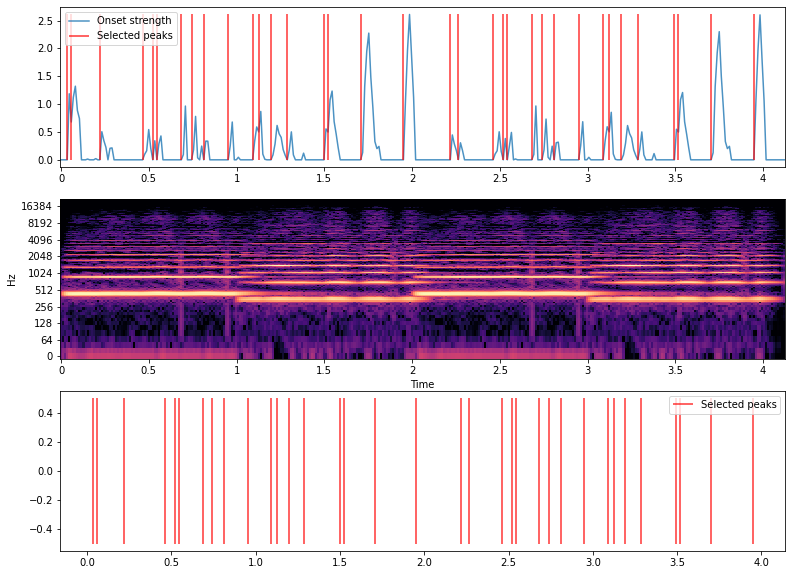

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [5]:
plt.figure(figsize=(13, 10))

# Draw spectrogram
ax = plt.subplot(3, 1, 2)
D = librosa.stft(y)
librosa.display.specshow(
    librosa.amplitude_to_db(librosa.magphase(D)[0], ref=np.max),
    sr=sr,
    hop_length=hop_length,
    y_axis='log',
    x_axis='time')

# Draw onsets & strenghts
plt.subplot(3, 1, 1, sharex=ax)
plt.plot(times, onset_envelope, alpha=0.8, label='Onset strength')
plt.vlines(times[onsets], 0, onset_envelope.max(),
           color='r', alpha=0.8, label='Selected peaks')
plt.legend(frameon=True, framealpha=0.8)

# Draw waveform with onset markings
plt.subplot(3, 1, 3)
plt.vlines(times[onsets], -0.5, 0.5, color='r',
           alpha=0.8, label='Selected peaks')
plt.legend(frameon=True, framealpha=0.8)
librosa.display.waveplot(y, sr=sr)

plt.axis('tight')
plt.tight_layout()

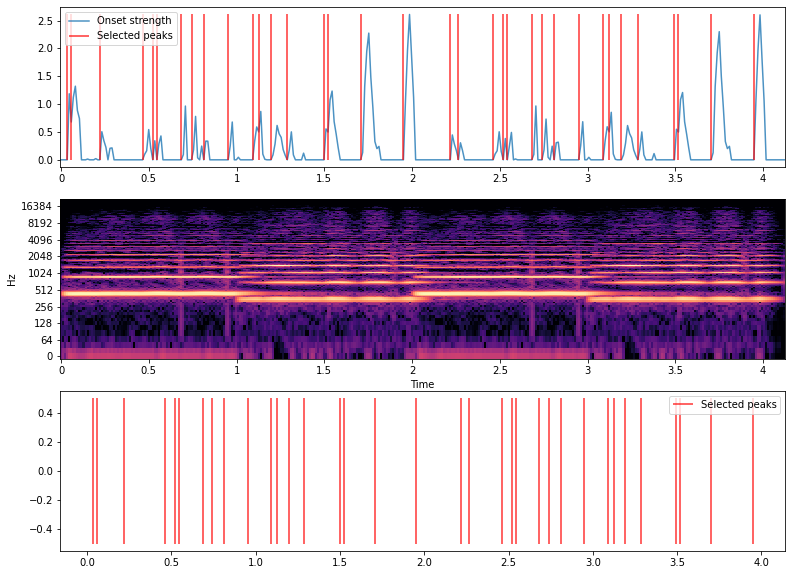

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [6]:
clicks = librosa.clicks(frames=onsets, sr=sr, length=len(y))
ipd.Audio(y + clicks, rate=sr)

In [ ]:
# Rulebased AI: if pitch differs, new onset